# Deep Learning

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

fashion_mnist = tf.keras.datasets.fashion_mnist



In [3]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

## Display Dataset Sample

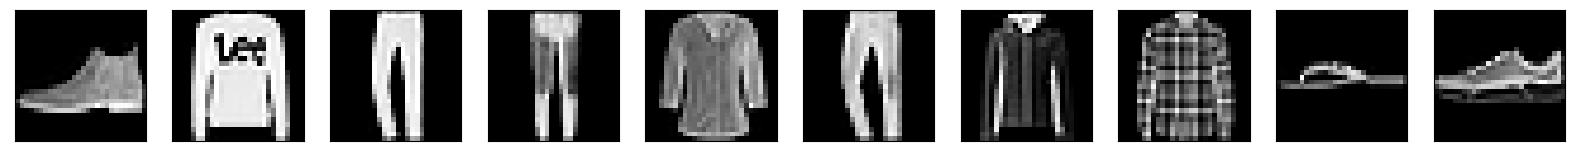

In [4]:
import matplotlib.pyplot as plt

# Number of images to display 
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first "n" images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image (Corrected Reshape)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")  

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show all images in one figure (move plt.show() outside the loop)
plt.show()


## Flattening the Images

In [73]:
# Print the shapes of the original training data and labels
print("Previous x_train shape: {} \nPrevious y_train shape: {}".format(x_train.shape, y_train.shape))

# Reshape training and testing data to a flat format (flattening the images)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

Previous x_train shape: (60000, 28, 28) 
Previous y_train shape: (60000,)


## MinMax Scaling

In [74]:
# Convert the data from image to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

#  Normalize the pixel values to a range between 0 and 1,
#  Zero is for Black and 1 for White
x_train /= 255
x_test /= 255

In [75]:
# Number of classes in the dataset
classes = 10
# Convert the labels to one-hot encoded format
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

# Print the shapes of the preprocessed training data and labels
print("New x_train shape: {} \nNew y_train shape: {}".format(x_train.shape, y_train.shape))


New x_train shape: (60000, 784) 
New y_train shape: (60000, 10)


## Defining ANN Architecture

In [76]:
input_size = 784
batch_size = 500
hidden1 = 400
hidden2 = 300
hidden3 = 200
hidden4 = 100
hidden5 = 50
hidden6 = 20
classes =10
epochs = 40

In [78]:
model = Sequential() # used to define movement of the data through model

model.add(Dense(hidden1, input_dim = input_size, activation= 'relu'))

model.add(Dense(hidden2, activation='relu'))

model.add(Dense(hidden3, activation='relu'))

model.add(Dense(hidden4, activation='relu'))

model.add(Dense(hidden5, activation='relu'))

model.add(Dense(hidden6, activation='relu'))

model.add(Dense(classes, activation='softmax'))

# Compilation
model.compile(loss="categorical_crossentropy",
              metrics=['accuracy'], optimizer='sgd')

model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 400)               314000    
                                                                 
 dense_46 (Dense)            (None, 300)               120300    
                                                                 
 dense_47 (Dense)            (None, 200)               60200     
                                                                 
 dense_48 (Dense)            (None, 100)               20100     
                                                                 
 dense_49 (Dense)            (None, 50)                5050      
                                                                 
 dense_50 (Dense)            (None, 20)                1020      
                                                                 
 dense_51 (Dense)            (None, 10)               

## Model Training

In [79]:
from time import time

tic = time()

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

toc = time()

print("Model Training Took {} Secs".format(toc - tic))


Epoch 1/40
120/120 [==============================] - 9s 51ms/step - loss: 2.1408 - accuracy: 0.2016
Epoch 2/40
120/120 [==============================] - 7s 57ms/step - loss: 1.5452 - accuracy: 0.5293
Epoch 3/40
120/120 [==============================] - 6s 47ms/step - loss: 0.9748 - accuracy: 0.6562
Epoch 4/40
120/120 [==============================] - 7s 57ms/step - loss: 0.7986 - accuracy: 0.7106
Epoch 5/40
120/120 [==============================] - 6s 49ms/step - loss: 0.7192 - accuracy: 0.7466
Epoch 6/40
120/120 [==============================] - 5s 41ms/step - loss: 0.6590 - accuracy: 0.7678
Epoch 7/40
120/120 [==============================] - 5s 38ms/step - loss: 0.6063 - accuracy: 0.7871
Epoch 8/40
120/120 [==============================] - 4s 36ms/step - loss: 0.5918 - accuracy: 0.7918
Epoch 9/40
120/120 [==============================] - 4s 33ms/step - loss: 0.5595 - accuracy: 0.8049
Epoch 10/40
120/120 [==============================] - 5s 38ms/step - loss: 0.5394 - accura

## Accuracy

In [82]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1,0)

test_accuracy = accuracy_score(y_pred, y_test)
print('\nTest Accuracy {}'.format(test_accuracy))


Test Accuracy 0.8164


In [83]:
mask = range(20, 50)

x_valid =x_test[0:20]
actual_labels = y_test[0:20]

y_pred_probs_valid = model.predict(x_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 [==============================] - 0s 73ms/step


## Plotting the Results

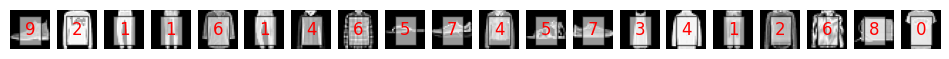

In [90]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

n = len(x_valid)

for i in range(n):
    # Display the image
    ax = plt.subplot(2, n, i + 1)  # Arrange in a grid of 2 rows, n columns
    plt.imshow(x_valid[i].reshape(28, 28), cmap='gray')  # Adjust shape if necessary
    plt.axis('off')  # Hide axes

    # Get the predicted label
    predicted_digit = np.argmax(y_pred_probs_valid[i])

    # Add prediction text to the image
    plt.text(14, 14, str(predicted_digit), fontsize=12, ha='center', va='center', color='red', bbox=dict(facecolor='white', alpha=0.6))

plt.show()
plt.close()
